<a href="https://colab.research.google.com/github/mark-polo/machine-learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
import cv2
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
! git clone https://github.com/mark-polo/Kaggle-competitions.git

Cloning into 'Kaggle-competitions'...
remote: Enumerating objects: 3977, done.
remote: Counting objects: 100% (1228/1228), done.
remote: Compressing objects: 100% (1223/1223), done.
remote: Total 3977 (delta 10), reused 1223 (delta 5), pack-reused 2749
Receiving objects: 100% (3977/3977), 221.86 MiB | 23.83 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Checking out files: 100% (4328/4328), done.


**Classification nike , adidas and converse**

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/Kaggle-competitions/archive"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 0 images in /content/kaggle-image-classification
There are 3 directories and 0 images in /content/kaggle-image-classification/train
There are 0 directories and 237 images in /content/kaggle-image-classification/train/converse
There are 0 directories and 237 images in /content/kaggle-image-classification/train/nike
There are 0 directories and 158 images in /content/kaggle-image-classification/train/adidas
There are 3 directories and 0 images in /content/kaggle-image-classification/test
There are 0 directories and 38 images in /content/kaggle-image-classification/test/converse
There are 0 directories and 38 images in /content/kaggle-image-classification/test/nike
There are 0 directories and 38 images in /content/kaggle-image-classification/test/adidas


In [ ]:
! rmdir /content/kaggle-image-classification/train/.ipynb_checkpoints
! rmdir /content/kaggle-image-classification/test/.ipynb_checkpoints

In [ ]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/content/kaggle-image-classification/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['adidas' 'converse' 'nike']


In [ ]:
train_dir = "/content/kaggle-image-classification/train"
test_dir = "/content/kaggle-image-classification/test"

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_datagen_augmented = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
print("Augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (240,240),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=False)

#Create non augmented train data batches
print("Non augmented trainin data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (240,240),
                                               class_mode = "categorical",
                                               shuffle = False)

#Create non aumented test data batches
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(directory = test_dir,
                                               batch_size= 32,
                                               target_size= (240,240),
                                               class_mode = "categorical")

Augmented training data
Found 632 images belonging to 3 classes.
Non augmented trainin data
Found 632 images belonging to 3 classes.
Non augmented test data
Found 114 images belonging to 3 classes.


In [ ]:
images, labels = train_data.next()
augmented_images, augmented_labels =train_data_augmented.next()
len(images)

32

 Showing image num: 18


(-0.5, 239.5, 239.5, -0.5)

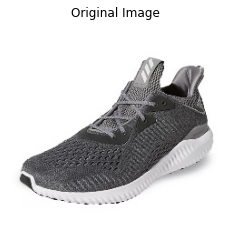

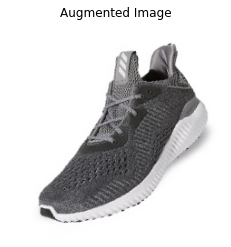

In [ ]:
import random
random_number = random.randint(0,31)
print(f" Showing image num: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

In [ ]:
print("Shuffled Augmented training data")
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (240,240),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=True)

shuffled_augmented_images, shuffled_augmented_labels =train_data_augmented.next()

Shuffled Augmented training data
Found 632 images belonging to 3 classes.


 Showing image num: 26


(-0.5, 239.5, 239.5, -0.5)

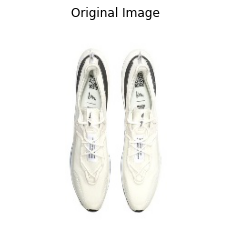

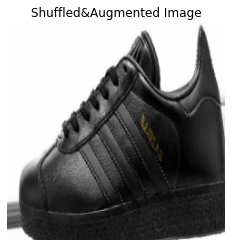

In [ ]:
import random
random_number = random.randint(0,31)
print(f" Showing image num: {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()
plt.imshow(shuffled_augmented_images[random_number])
plt.title("Shuffled&Augmented Image")
plt.axis(False)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(240,240,3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 240, 240, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 240, 240, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 240, 240, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 240, 240, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 120, 120, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 64)      3

In [ ]:
model.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_augmented_shuffled,
                                 epochs=30,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = int(0.25*len(test_data)))

Epoch 1/30
20/20 [==============================] - 273s 13s/step - loss: 3.7580 - accuracy: 0.3354 - val_loss: 1.0986 - val_accuracy: 0.3750
Epoch 2/30
20/20 [==============================] - 272s 14s/step - loss: 1.0972 - accuracy: 0.3734 - val_loss: 1.1046 - val_accuracy: 0.2500
Epoch 3/30
20/20 [==============================] - 266s 13s/step - loss: 1.0935 - accuracy: 0.3687 - val_loss: 1.1101 - val_accuracy: 0.2500
Epoch 4/30
20/20 [==============================] - 271s 14s/step - loss: 1.0883 - accuracy: 0.3734 - val_loss: 1.1038 - val_accuracy: 0.2812
Epoch 5/30
20/20 [==============================] - 268s 14s/step - loss: 1.0789 - accuracy: 0.4098 - val_loss: 1.1122 - val_accuracy: 0.3125
Epoch 6/30
20/20 [==============================] - 274s 14s/step - loss: 1.0639 - accuracy: 0.4557 - val_loss: 1.0852 - val_accuracy: 0.3750
Epoch 7/30
20/20 [==============================] - 268s 13s/step - loss: 1.0642 - accuracy: 0.4525 - val_loss: 1.0967 - val_accuracy: 0.4062
Epoch 

In [ ]:
model.evaluate(test_data)

4/4 [==============================] - 11s 2s/step - loss: 0.9541 - accuracy: 0.5965


[0.9541000127792358, 0.5964912176132202]

In [ ]:
y_probs = model.predict(test_data)

y_pred = y_probs.argmax(axis = 1)

In [ ]:
y_pred[:10]

array([0, 1, 2, 1, 1, 1, 1, 1, 1, 0])

Text(0.5, 1.0, 'Loss Curves')

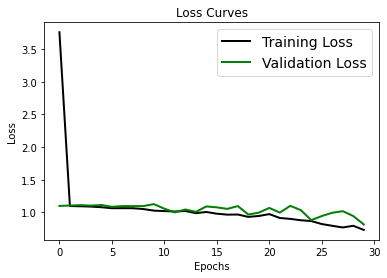

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

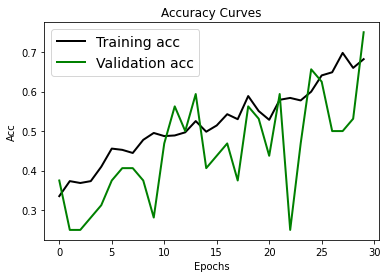

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth=2.0)
plt.legend(['Training acc', 'Validation acc'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Acc', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Pizza or Not Pizza**

train - pizza -> 685 items

train - not-pizza -> 685 items

all in train 1370 -> 70 %

---------------------------

validation - pizza -> 298 items

validation - not-pizza -> 298 items

all in train 596 -> 30 %

For validation iamges need take from end of dataset

In [ ]:
for dirpath, dirnames, filenames in os.walk("/content/Kaggle-competitions/pizza_not_pizza"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in /content/Kaggle-competitions/pizza_not_pizza
There are 2 directories and 1 images in /content/Kaggle-competitions/pizza_not_pizza/validation
There are 0 directories and 299 images in /content/Kaggle-competitions/pizza_not_pizza/validation/not-pizzal
There are 0 directories and 298 images in /content/Kaggle-competitions/pizza_not_pizza/validation/pizza
There are 2 directories and 1 images in /content/Kaggle-competitions/pizza_not_pizza/train
There are 0 directories and 685 images in /content/Kaggle-competitions/pizza_not_pizza/train/not-pizza
There are 0 directories and 685 images in /content/Kaggle-competitions/pizza_not_pizza/train/pizza


In [ ]:
! rmdir /content/sillicon-valley/validation/.ipynb_checkpoints

In [ ]:
train_dir = "/content/Kaggle-competitions/pizza_not_pizza/train"
val_dir = "/content/Kaggle-competitions/pizza_not_pizza/validation"

In [ ]:
class_names = ['not_pizza', 'pizza']

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1 / 255.0,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_datagen_augmented = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_datagen = ImageDataGenerator(rescale=1 / 255.0)

In [ ]:
print("Augmented training data")
train_data_augmented= train_datagen_augmented.flow_from_directory(directory = train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=False)

#Create non augmented train data batches
print("Non augmented trainin data")
train_data = train_datagen.flow_from_directory(directory = train_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical",
                                               shuffle = False)

#Create non aumented test data batches
print("Non augmented test data")
test_data = test_datagen.flow_from_directory(directory = val_dir,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")


Augmented training data
Found 1370 images belonging to 2 classes.
Non augmented trainin data
Found 1370 images belonging to 2 classes.
Non augmented test data
Found 596 images belonging to 2 classes.


In [ ]:
print("Shuffled Augmented training data")
train_data_augmented_shuffled= train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=True)

shuffled_augmented_images, shuffled_augmented_labels =train_data_augmented.next()

Shuffled Augmented training data
Found 1370 images belonging to 2 classes.


In [ ]:
model_pizza = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(2, activation="softmax")
])

In [ ]:
model_pizza.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      3

In [ ]:
model_pizza.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model_pizza.fit(train_data_augmented_shuffled,
                                 epochs=30,
                                 steps_per_epoch = len(train_data),
                                 validation_data = test_data,
                                 validation_steps = int(0.25*len(test_data)))

Epoch 1/30
43/43 [==============================] - 542s 13s/step - loss: 2.3931 - accuracy: 0.6022 - val_loss: 0.6784 - val_accuracy: 0.6953
Epoch 2/30
43/43 [==============================] - 538s 13s/step - loss: 0.6225 - accuracy: 0.6562 - val_loss: 0.6947 - val_accuracy: 0.4844
Epoch 3/30
43/43 [==============================] - 539s 13s/step - loss: 0.5477 - accuracy: 0.7212 - val_loss: 0.6562 - val_accuracy: 0.6797
Epoch 4/30
43/43 [==============================] - 541s 13s/step - loss: 0.5651 - accuracy: 0.7161 - val_loss: 0.6336 - val_accuracy: 0.5859
Epoch 5/30
43/43 [==============================] - 551s 13s/step - loss: 0.5053 - accuracy: 0.7606 - val_loss: 0.6244 - val_accuracy: 0.7812
Epoch 6/30
43/43 [==============================] - 543s 13s/step - loss: 0.4945 - accuracy: 0.7577 - val_loss: 0.6038 - val_accuracy: 0.6562
Epoch 7/30
43/43 [==============================] - 539s 13s/step - loss: 0.4676 - accuracy: 0.7869 - val_loss: 0.5939 - val_accuracy: 0.7969
Epoch 

Text(0.5, 1.0, 'Loss Curves')

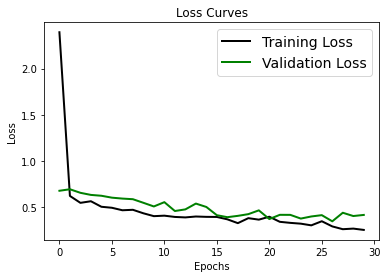

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

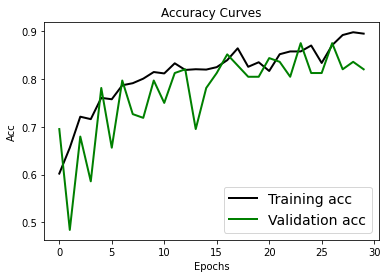

In [ ]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'green', linewidth=2.0)
plt.legend(['Training acc', 'Validation acc'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Acc', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

**Testing**

In [ ]:
model_pizza.evaluate(test_data)

19/19 [==============================] - 48s 3s/step - loss: 0.3722 - accuracy: 0.8406


[0.3722497522830963, 0.8406040072441101]

In [ ]:
y_probs = model_pizza.predict(test_data)

y_pred = y_probs.argmax(axis = 1)

y_pred[:10]

array([1, 0, 0, 0, 1, 1, 0, 0, 1, 0])

In [ ]:
print(class_names[y_pred[0]])

NameError: ignored

**-------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Kaggle competition 2022**

123

In [ ]:
for dirpath, dirname, filenames in os.walk("/content/Kaggle-competitions/kaggle coffee"):
    print(f"There are {len(dirname)} directories and {len(filenames)} images in {dirpath}")

There are 2 directories and 1 images in /content/Kaggle-competitions/kaggle coffee
There are 4 directories and 0 images in /content/Kaggle-competitions/kaggle coffee/test
There are 0 directories and 100 images in /content/Kaggle-competitions/kaggle coffee/test/Dark
There are 0 directories and 100 images in /content/Kaggle-competitions/kaggle coffee/test/Green
There are 0 directories and 100 images in /content/Kaggle-competitions/kaggle coffee/test/Light
There are 0 directories and 100 images in /content/Kaggle-competitions/kaggle coffee/test/Medium
There are 4 directories and 1 images in /content/Kaggle-competitions/kaggle coffee/train
There are 0 directories and 300 images in /content/Kaggle-competitions/kaggle coffee/train/Dark
There are 0 directories and 300 images in /content/Kaggle-competitions/kaggle coffee/train/Green
There are 0 directories and 300 images in /content/Kaggle-competitions/kaggle coffee/train/Light
There are 0 directories and 300 images in /content/Kaggle-competit

In [ ]:
train_folder = "/content/Kaggle-competitions/kaggle coffee/train"
test_folder = "/content/Kaggle-competitions/kaggle coffee/test"

In [ ]:
train_image_idg_aug = ImageDataGenerator(
        rescale=1 / 255.0,
        rotation_range=20,
        zoom_range=0.05,
        width_shift_range=0.05,
        height_shift_range=0.05,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

train_image_idg = ImageDataGenerator(
        rescale=1 / 255.0,
        shear_range=0.05,
        horizontal_flip=True,
        fill_mode="nearest",
        validation_split=0.20)

test_image_idg = ImageDataGenerator(rescale = 1/255.0)

In [ ]:
train_data = train_image_idg_aug.flow_from_directory(directory = train_folder,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=False)

original = train_image_idg.flow_from_directory(directory = train_folder,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")

test_data = test_image_idg.flow_from_directory(directory = test_folder,
                                               batch_size= 32,
                                               target_size= (224,224),
                                               class_mode = "categorical")


Found 1200 images belonging to 4 classes.
Found 1200 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [ ]:
images, labels = original.next()
transformed_images, transformed_labels =train_data.next()

In [ ]:
import random
import matplotlib.image as image

def view_images(original, transformed):
  random_number = random.randint(0,31)
  print(f" Showing image num: {random_number}")
  plt.imshow(original[random_number])
  plt.title("Original Image")
  plt.axis(False)
  plt.figure()
  plt.imshow(transformed[random_number])
  plt.title("Transformed Image")
  plt.axis(False)

 Showing image num: 8


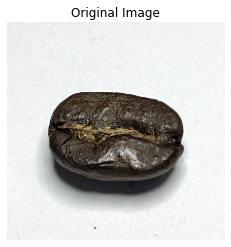

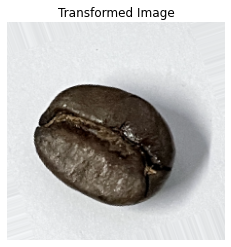

In [ ]:
view_images(images, transformed_images)

In [ ]:
train_data_shuffled = train_image_idg_aug.flow_from_directory(train_folder,
                                                                  target_size = (224,224),
                                                                  batch_size = 32,
                                                                  class_mode = "categorical",
                                                                  shuffle=True)

shuffled_images, shuffled_labels = train_data.next()

Found 1200 images belonging to 4 classes.


 Showing image num: 27


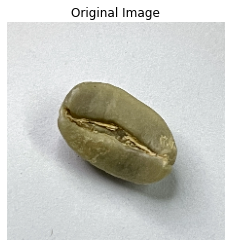

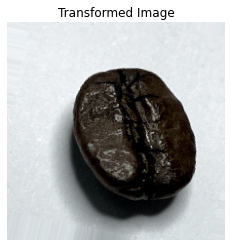

In [ ]:
view_images(images, shuffled_images)

In [ ]:
coffee_classes = os.listdir(train_folder)

In [ ]:
coffee_classes

['.DS_Store', 'Dark', 'Green', 'Light', 'Medium']

In [ ]:
os.remove("/content/Kaggle-competitions/kaggle coffee/train/.DS_Store")

In [ ]:
model_coffee = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, kernel_size=(3,3), padding="same", activation="relu", input_shape=(224,224,3)),
    tf.keras.layers.BatchNormalization(),

    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(64, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(128, kernel_size=(3,3), padding="same", activation="relu"),
    # tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.15),
    tf.keras.layers.Dense(1024, activation="relu"),
    tf.keras.layers.Dense(4, activation="softmax")
])

In [ ]:
model_coffee.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      18496     
                                                                 
 dropout (Dropout)           (None, 224, 224, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 64)      3

In [ ]:
model_coffee.compile(optimizer="adam", loss=tf.keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
history = model_coffee.fit(train_data_shuffled,
                                 epochs=30,
                                 steps_per_epoch = len(original),
                                 validation_data = test_data,
                                 validation_steps = int(0.25*len(test_data)))

Epoch 1/30
38/38 [==============================] - 459s 12s/step - loss: 1.0373 - accuracy: 0.7525 - val_loss: 1.3781 - val_accuracy: 0.2188
Epoch 2/30
38/38 [==============================] - 456s 12s/step - loss: 0.1616 - accuracy: 0.9450 - val_loss: 1.2958 - val_accuracy: 0.7188
Epoch 3/30
38/38 [==============================] - 460s 12s/step - loss: 0.1220 - accuracy: 0.9583 - val_loss: 1.1725 - val_accuracy: 0.5521
Epoch 4/30
38/38 [==============================] - 462s 12s/step - loss: 0.0776 - accuracy: 0.9742 - val_loss: 0.8995 - val_accuracy: 0.9583
Epoch 5/30
38/38 [==============================] - 464s 12s/step - loss: 0.1962 - accuracy: 0.9408 - val_loss: 1.1308 - val_accuracy: 0.5104
Epoch 6/30
38/38 [==============================] - 457s 12s/step - loss: 0.0576 - accuracy: 0.9783 - val_loss: 0.8512 - val_accuracy: 0.6979
Epoch 7/30
38/38 [==============================] - 473s 12s/step - loss: 0.0455 - accuracy: 0.9808 - val_loss: 0.6035 - val_accuracy: 0.8750
Epoch 

In [ ]:
def view_fitting():
  plt.figure(figsize=[6,4])
  plt.plot(history.history['loss'], 'black', linewidth=2.0)
  plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
  plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
  plt.xlabel('Epochs', fontsize=10)
  plt.ylabel('Loss', fontsize=10)
  plt.title('Loss Curves', fontsize=12)

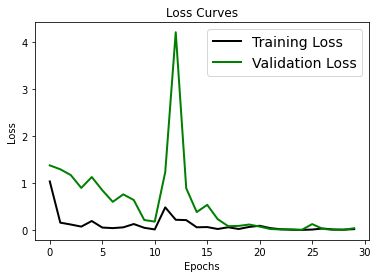

In [ ]:
view_fitting()

In [ ]:
model_coffee.evaluate(test_data)

13/13 [==============================] - 32s 2s/step - loss: 0.0436 - accuracy: 0.9875


[0.04364335909485817, 0.987500011920929]

In [ ]:
def preprocess_images(filename, img_shape = 224):
  img = tf.io.read_file(filename) #read image
  img = tf.image.decode_image(img) # decode the image to a tensor
  img = tf.image.resize(img, size = [img_shape, img_shape]) # resize the image
  img = img/255. # rescale the image
  return img

In [ ]:
def predict(filename):
  img = preprocess_images(filename)
  prediction = model_coffee.predict(tf.expand_dims(img, axis=0))
  if len(prediction[0]) > 1:
    pred = coffee_classes[prediction.argmax()]
  else:
    pred = coffee_classes[int(tf.round(prediction)[0][0])]

  plt.figure(figsize=(7,7))
  plt.imshow(img)
  plt.title(f"This is a {pred}")
  plt.show()

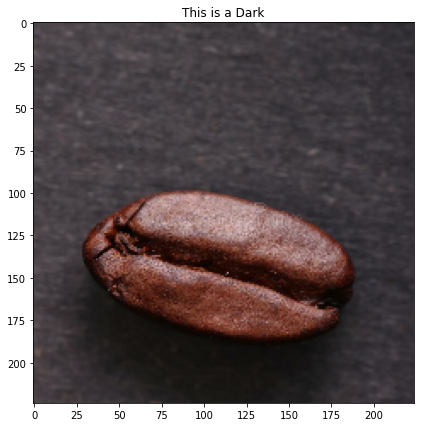

Dark


In [ ]:
predict("/content/одно-кофейное-зерно-на-темном-фоне-изолированное-с-пространством-для-183888562.jpeg")

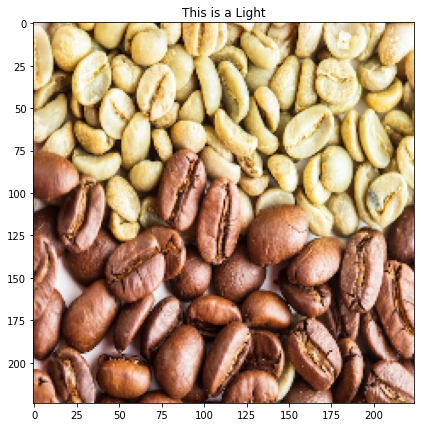

Light


In [ ]:
predict("/content/black-and-green-coffee-beans-as-a-background-various-types-of-coffee_290431-7735.jpeg")